# What's the most random number

This will be good for making unique passwords.


In [42]:
from dotenv import load_dotenv

load_dotenv()

True

In [43]:
# import shit
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import re

In [44]:
# O(1)
API_KEY = os.getenv("GEMINI_API")
NUM_SAMPLES = 10  # Number of times to call the API
RAND_MIN = 1
RAND_MAX = 10

API_URL = f"https://generativelanguage.googleapis.com/v1beta/models/gemini-2.0-flash:generateContent?key={API_KEY}"
PROMPT = f"Pick number from {RAND_MIN} to {RAND_MAX}"

In [ ]:
def get_random_number() -> int:
    response = requests.post(
        API_URL,
        json={"contents": [{"parts": [{"text": PROMPT}]}]},
        headers={"Content-Type": "application/json"},
    )
    if response.status_code == 200:
        response_json = response.json()
        response_text = response_json["candidates"][0]["content"]["parts"][0]["text"]
        print(response_text.strip())
        return int(re.findall(r"\d+", response_text)[-1])

    else:
        print(f"HTTP error: {response.status_code}")
        raise Exception(response.text)

In [46]:
# Collect data
data: list[int] = []
for _ in range(NUM_SAMPLES):
    try:
        data.append(get_random_number())
    except Exception as e:
        print(e)
data

Okay, I'll pick a number.  I choose... **7**!
Okay, I'll pick a number. I choose... **7**
Okay, I'll pick a number from 1 to 10. I choose... **7**
Okay, I pick the number **7**.
Okay, I'll pick the number **7**.
Okay, I'll pick a number. I choose **7**.
Okay, I'll pick a number. I choose **7**.
Okay, I pick the number **7**.
Okay, I'll pick a number. I choose **7**.
Okay, I'll pick the number... **7**


[7, 7, 7, 7, 7, 7, 7, 7, 7, 7]

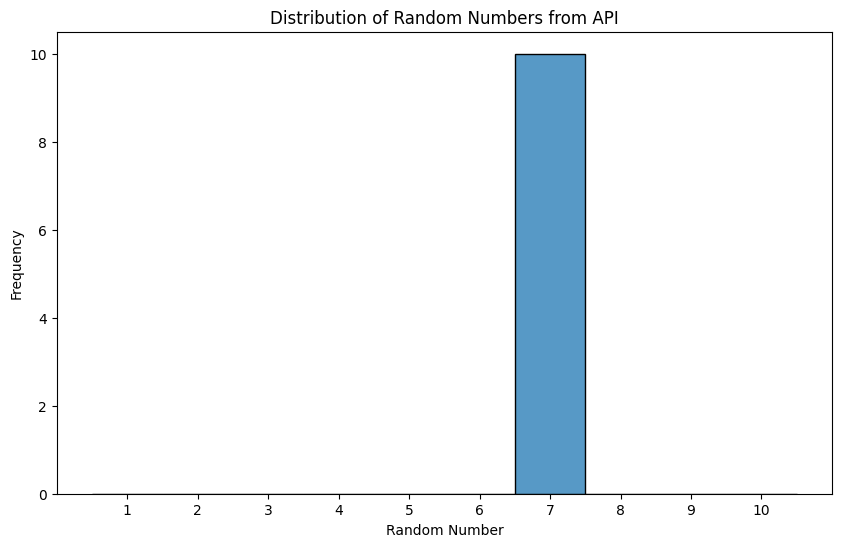

In [47]:
# Plot the distribution
plt.figure(figsize=(10, 6))
sns.histplot(
    data, bins=np.arange(RAND_MIN, RAND_MAX + 2) - 0.5, kde=False, edgecolor="black"
)
plt.xticks(range(RAND_MIN, RAND_MAX + 1))
plt.xlabel("Random Number")
plt.ylabel("Frequency")
plt.title("Distribution of Random Numbers from API")
plt.show()